<a href="https://colab.research.google.com/github/MsUn-123/webcam-scrapper/blob/main/forsensFaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Some kind of God of War youtube frames scraper.***
Feel free to... donkSmall.png<br>Made with Python and some other donk things.
<br>*Why I'm doing this?*

##Preparing dependencies
Installing this and that. Making sure that we have everything needed.

In [2]:
!pip install youtube-dl
!pip install ffmpeg
!apt-get install jq

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
jq is already the newest version (1.5+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


##Preparing playlist and downloading images
Now we need to make playlist of videos we want to scrape... For that you need channels video tab URL and tweak some settings. 
This script will generate output.csv file which contains duration of the video and id. We need duration to use vids with length more than 1 hour so we can take ~4 images in 40 mins of the vid. donkSmall.png Variables 'start' and 'end' lets you choose specified indecies of playlist. If 'start' = 1 then you will start from the latest channel video. 'end' should be greater than 'start'. 'end' variable can exceed videos number.donkSmall.png This thing extracted 100 vid urls in 50 seconds, results may wary.


In [4]:
channel = 'https://www.twitch.tv/forsen/videos' #@param { type: 'string' }

platform = 'tw' #@param ["yt", "tw"]
start = 1 #@param { type: 'number' }
end = 100 #@param { type: 'number' }

!youtube-dl --dump-json --playlist-items {start}-{end} {channel} | jq -r '[.duration,.id]|@json' > output.json

Serialyzing output.json.
Removing unwanted symbols from lines bcs jq is waytoodonkSmall.gif
And bash scripting is dark ocean for me.

In [3]:
dataFile = 'output.json'
output = []

data = open(dataFile, 'r')
for line in data:
  line = line.replace('[', '').replace(']', '') #
  line = line.replace('"', '')                  #and i'm too stupid to understand anything in bash scripting
  line = line.replace('\n', '')
  line = line.split(',')
  line[1] = line[1].replace('v', '')
  output.append(line)
data.close()

We got a list of forsens twitch vids. Here you can see a number before id which means duration of vid in seconds. They are all more than 20000 secs (~5 hours) so we can get, for example 5-10 images per stream so we will get ~450-500 images of forsen in total. Now we can see some output stats.

In [4]:
print(f"We've collected {len(output)} videos")
print('First line:', output[0])
print('Last line:', output[len(output)-1])

We've collected 52 videos
First line: ['22292', '1701544619']
Last line: ['21476', '1641555095']


**Taking frames from videos**<br>
Here we crate directory 'dataset' if it not exists, receive video stream URL using our output data file and downloading 15 images (one image/minute) per video. Acessing video with URL and if length of video is somewhere between 4-5 hours.

In [5]:
import os

if not os.path.exists('dataset'):
    os.mkdir('dataset')

In [ ]:
import datetime

channel = 'https://www.twitch.tv/forsen/videos' 

if 'twitch' in channel: url = 'https://www.twitch.tv/videos/'
if 'youtube' in channel: url = 'https://www.youtube.com/watch/'

filename = 0
timestamp = 0
frames = 10 #scrapping 15 frames from every video
timestep = 1200 #every 20 minutes (1200 seconds)
minSecs = 18000 #so we need at least 5 hours of video (5h*60min*60secs)

for i in range(len(output) - 1):

  if int(output[i][0]) > 19000:

    timestamp = 0
    vidStream = !youtube-dl -g 'https://www.twitch.tv/videos/{output[i][1]}'
    vidStream = vidStream[0]

    for f in range(frames):
      timestamp += timestep
      timeVid = str(datetime.timedelta(seconds = timestamp))
      !ffmpeg -ss {timeVid} -i {vidStream} -frames:v 1 -qmin 1 -q:v 1 dataset/{filename}.png
      filename += 1

print('Collected ', filename, 'images')

###Using opencv to filer output


Found 0 faces!


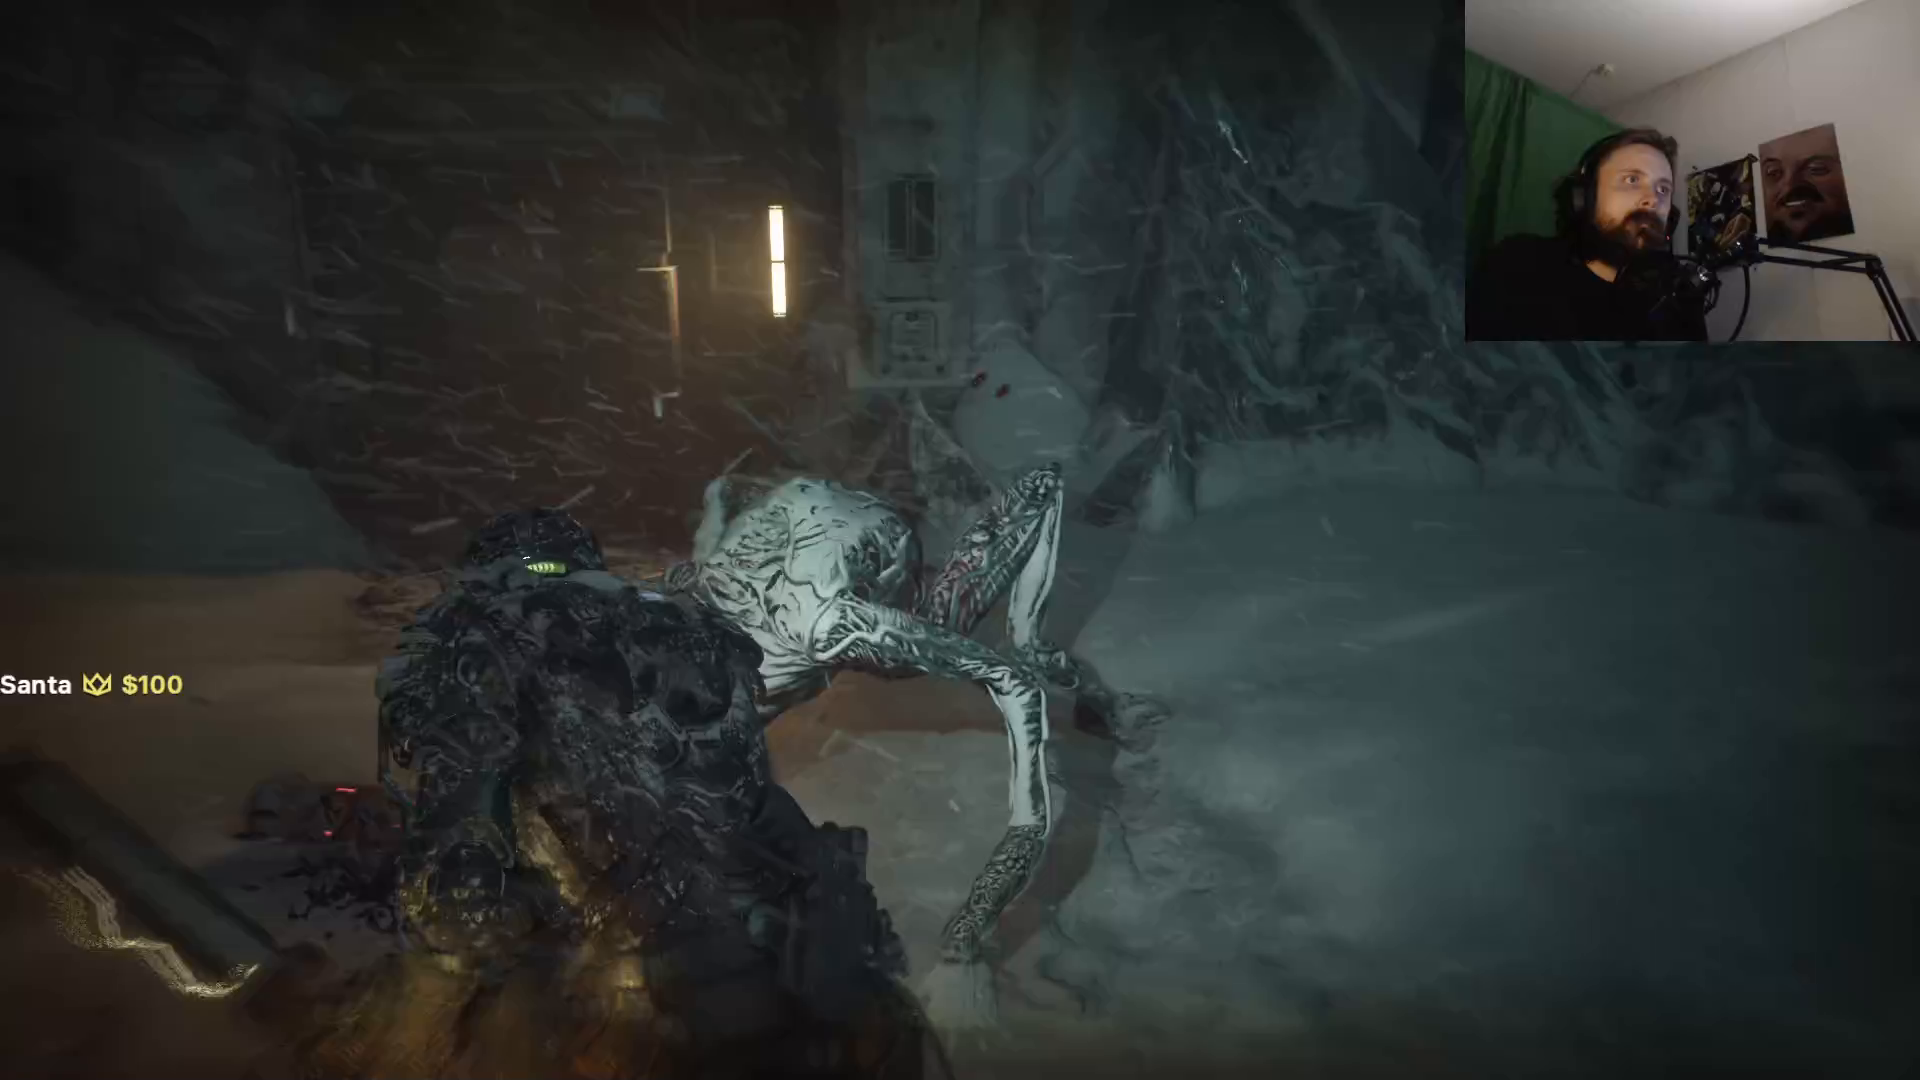

In [31]:
import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread('dataset/278.png')

cv2_imshow(image)

In [ ]:
import time
a = 0
while True:
  a += 1
  time.sleep(1)
  print(a)

##Downloading result
Collecting all dataset images into a zip file and downloading it

In [ ]:
from google.colab import files

!zip -r dataset.zip dataset/
files.download('dataset.zip')